In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
markers = ["d", "o", "v", "^", "<", ">", "1", "X", "p", "P", "*", "+"]
color = ['blueviolet','blue',"green",'orange','red','m']
fmt = ['om','og','or','ok','oy','om']
bands = ['u','g','r','i','z','y']

In [2]:
trasient_name = ["AGN", "KN", "SLSN", "SNIa", "SNIa-91bg", 
                 "SNIax", "SNIbc", "SNII", "TDE"
                ]

In [3]:
# 使用 seaborn 的颜色调色板
import seaborn as sns
colors = sns.color_palette("bright", n_colors=10)

In [4]:
from matplotlib import font_manager

In [5]:
font_manager.fontManager.addfont("/home/yltang/data/Times_New_Roman.ttf")

In [6]:
plt.style.use("seaborn-v0_8-paper")
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size':15,
         }

In [ ]:
def data_normal(data, max_flux):
    #max_flux = np.max(data[:, :, :3])
    for i in range(data.shape[0]): 
        max_flux_ = np.max(data[i, :, :3])
        for j in range(3):
            data[i, :, j] = (data[i, :, j]/(np.abs(max_flux_)+1)) * (np.log(np.abs(max_flux_+10)+10)/np.log(max_flux))
            data[i, :, j+3] = (data[i, :, j+3]/(np.abs(max_flux_)+1)) *  (np.log(np.abs(max_flux_+10)+10)/np.log(max_flux))
    return data

In [8]:
test_data_file = np.load("/home/yltang/data/work_1/data_3/test_data.npz")
test_data = test_data_file["data"]
test_label_file = np.load("/home/yltang/data/work_1/data_3/test_label.npz")
test_label = test_label_file["data"]

In [9]:
test_data.shape

(19594, 90, 6)

In [10]:
test_data = data_normal(data=test_data)

In [11]:
# data mask
mask_time = 6
def data_mask(data):
    data[:, mask_time:, :]=0
    return data

In [12]:
mask_test_data =data_mask(data=test_data.copy())

In [13]:
mask_test_data.shape

(19594, 90, 6)

In [14]:
id_=0

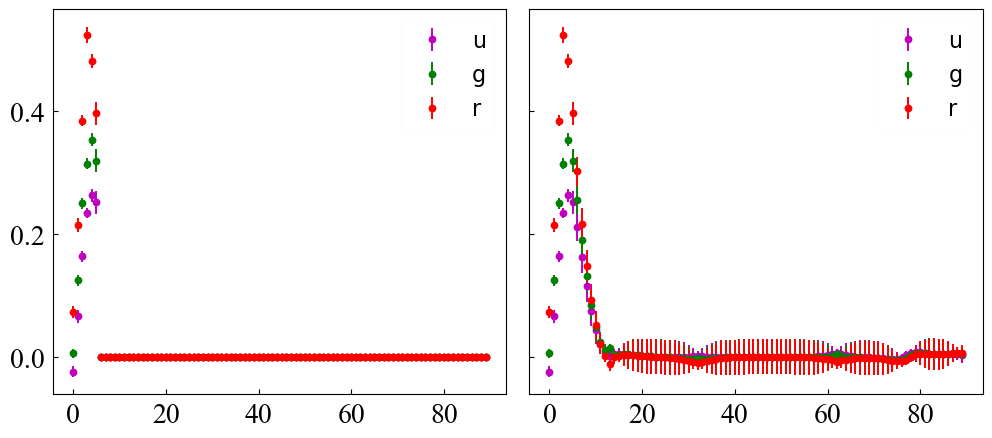

In [15]:
# 1. 相关模块导入
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文字体
#plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 3. 绘图
  # 3.1 共享X轴
figure,(ax1,ax2) = plt.subplots(1,2,
                                    figsize=(6*2,5),
                                    #dpi=1000,
                                    # 共享x轴
                                    sharey=True)
id_= id_ + 1

# 2. 创建制图数据
ax_list = [ax1,ax2]
for i in range(3):
    mjd = np.linspace(0,89,90)
    flux_1 = mask_test_data[id_,:,i]
    flux_err_1 = mask_test_data[id_,:,i+3]

    flux_2 = test_data[id_,:,i]
    flux_err_2 = test_data[id_,:,i+3]
    
    flux_list = [flux_1,flux_2]
    flux_err_list = [flux_err_1, flux_err_2]
    
    for j in range(2):
        ax_list[j].errorbar(x=mjd, y=flux_list[j], yerr=flux_err_list[j],fmt=fmt[i], capsize=2,label=bands[i])
        #ax_list[j].errorbar(x=mjd_1, y=flux_list[j], yerr=flux_err_list[j],color=color[i], marker=markers[i], capsize=2,label=label[i])

        ax_list[j].legend(fontsize="xx-large",loc="upper right",prop=font1)
        #设置坐标轴字体
        x1_label = ax_list[j].get_xticklabels() 
        [x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
        y1_label = ax_list[j].get_yticklabels() 
        [y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]

        #ax_list[j].set_ylim(-0.3,1.2)
        #ax_list[j].set_xlim(-7,85)
        
        # 2.4 坐标轴刻度字体颜色设置
        ax_list[j].tick_params(axis='y',
                     labelsize=20, # y轴字体大小设置
                     #color='r',    # y轴标签颜色设置  
                     #labelcolor='b', # y轴字体颜色设置
                     direction='in' # y轴标签方向设置
                      ) 
    
        ax_list[j].tick_params(axis='x',
                     labelsize=20, # y轴字体大小设置
                     #color='r',    # y轴标签颜色设置  
                     #labelcolor='b', # y轴字体颜色设置
                     direction='in' # y轴标签方向设置
                      )
        ax_list[j].legend(fontsize=16,
                      #bbox_to_anchor=(0,0.34,1.028, 1),
                      loc="upper right",
                      framealpha=0.2,
                     )

# 调整子图形之间的纵向距离
figure.subplots_adjust(wspace=0.05) 

#plt.savefig("reconstruction_1.jpg",bbox_inches='tight')

plt.show()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

2025-02-17 09:40:20.943455: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-17 09:40:20.956308: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-17 09:40:20.970865: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-17 09:40:20.975253: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 09:40:20.987395: I tensorflow/core/platform/cpu_feature_guar

In [17]:
#基本参数
num_time_steps = mask_test_data.shape[1]
num_features = mask_test_data.shape[2]
num_time_steps, num_features

(90, 6)

In [18]:
from keras.models import load_model
vae_decoder = load_model(f"/home/yltang/data/work_1/results_1/LSTM_decoder_{mask_time}.keras")
vae_encoder = load_model(f"/home/yltang/data/work_1/results_1/LSTM_encoder_{mask_time}.keras")

2025-02-17 09:40:44.147439: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14791 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


In [19]:
z_mean_test, z_log_var_test, pred_test = vae_encoder.predict(mask_test_data)

2025-02-17 09:40:48.514413: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [20]:
z_mean_test.shape, z_log_var_test.shape

((19594, 2), (19594, 2))

In [21]:
guess=[]

for i in range (len(mask_test_data)):
    guess.append(np.argmax(pred_test[i,:]))

In [22]:
ture=[]

for i in range (len(mask_test_data)):
    ture.append(np.argmax(test_label[i,:]))

In [23]:
len(guess), len(ture)

(19594, 19594)

In [24]:
incorrect_list = []
for i in range(len(mask_test_data)):
    if guess[i] != ture[i]:
        incorrect_list.append(i)

In [25]:
len(incorrect_list)

3084

In [26]:
batch_size = tf.shape(z_mean_test)[0]
z_size = tf.shape(z_mean_test)[1]
epsilon  = tf.random.normal(shape=(batch_size, z_size))
#sampling_vector = z_mean + tf.exp(0.5 * z_log_var[3]) * epsilon

sampling_vector = z_mean_test
reconstuct  = vae_decoder(sampling_vector)

In [27]:
z_mean_test[0]

array([-0.47276002,  0.73898935], dtype=float32)

In [28]:
index = 0

In [29]:
index += 1

In [30]:
id_ = incorrect_list[index]
id_

11

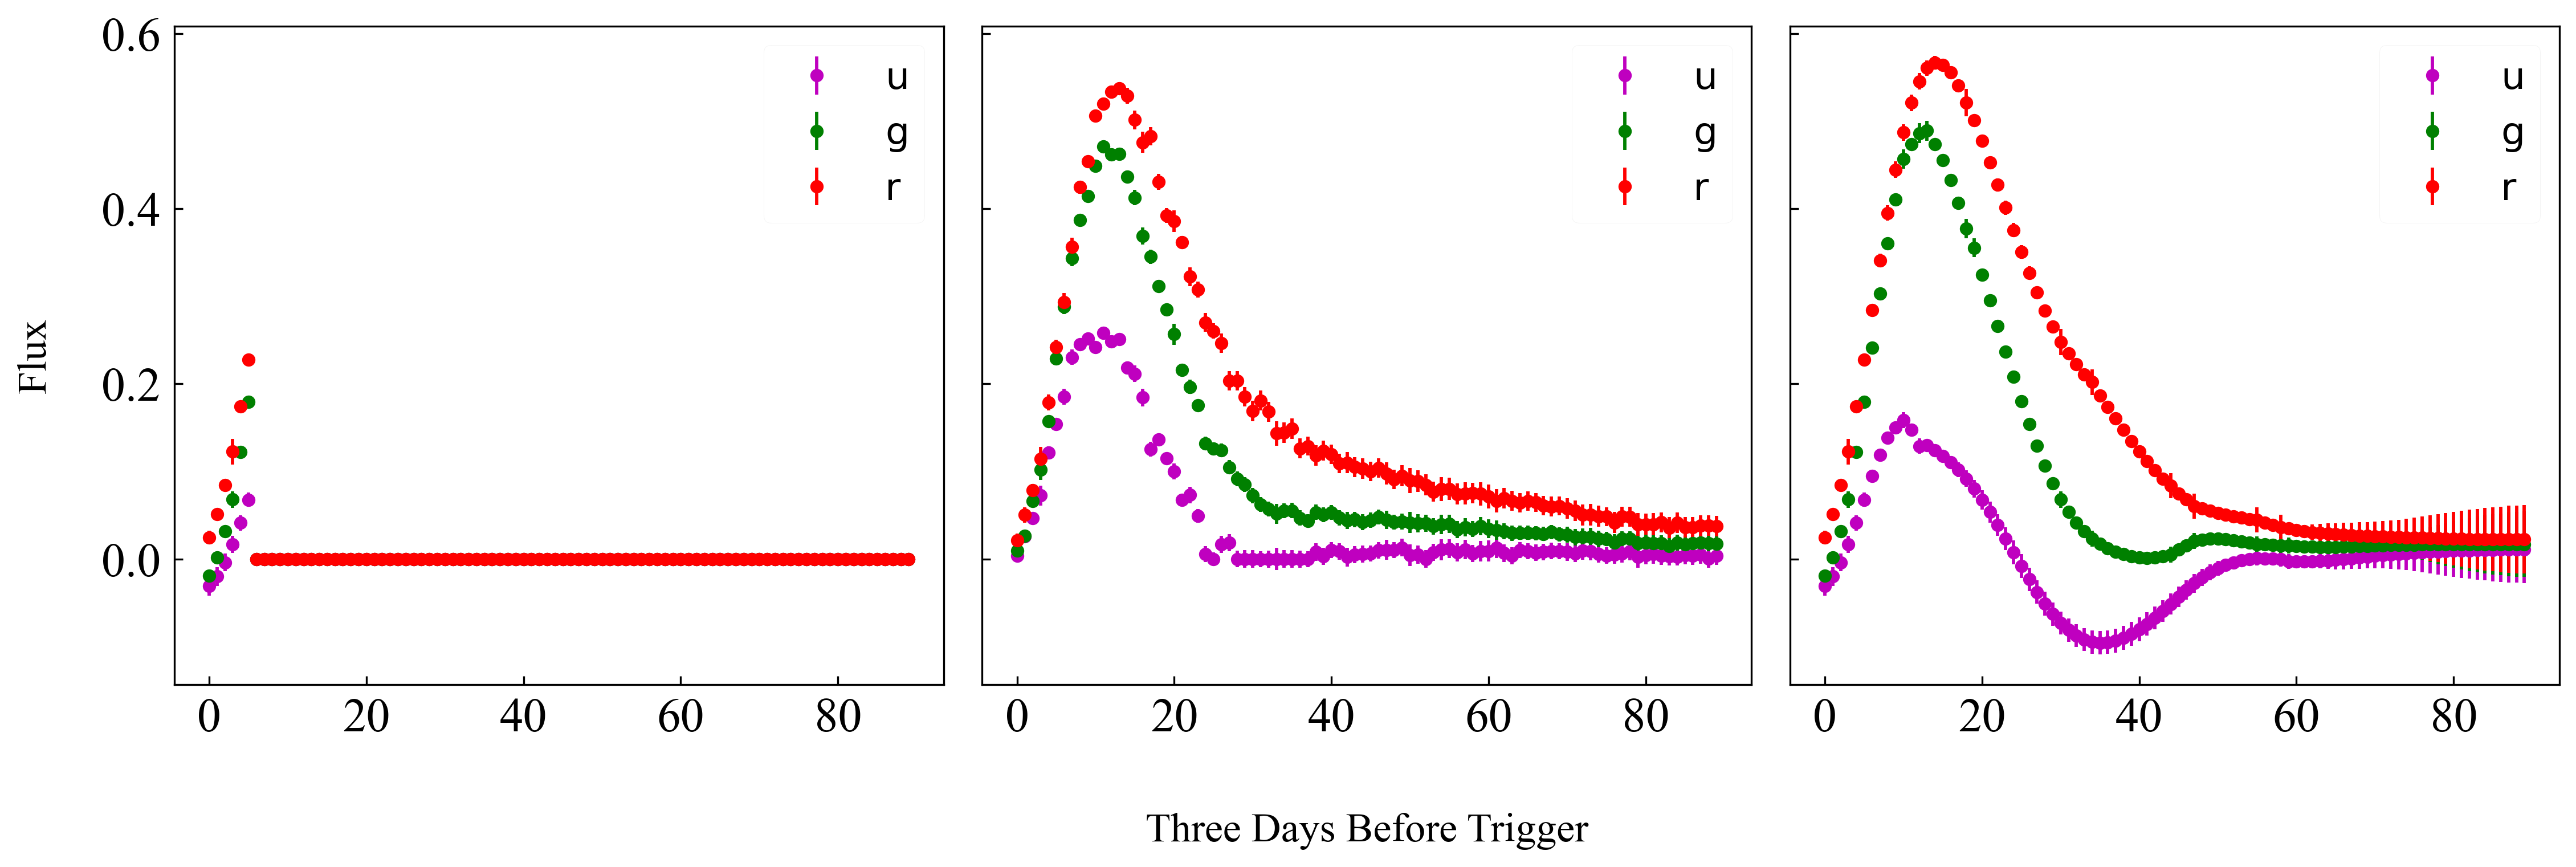

16


In [33]:
# 1. 相关模块导入
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文字体
#plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 3. 绘图
  # 3.1 共享X轴
figure,(ax1,ax2, ax3) = plt.subplots(1,3,
                                    figsize=(6*3,5),
                                    dpi=300,
                                    # 共享x轴
                                    sharey=True)

# 2. 创建制图数据
ax_list = [ax1,ax2, ax3]
for i in range(3):
    mjd = np.linspace(0,89,90)
    flux_1 = mask_test_data[id_,:,i]
    flux_err_1 = mask_test_data[id_,:,i+3]
    
    flux_2 = reconstuct[id_,:,i]
    flux_err_2 = reconstuct[id_,:,i+3]

    flux_3 = test_data[id_,:,i]
    flux_err_3 = test_data[id_,:,i+3]
    
    flux_list = [flux_1,flux_2, flux_3]
    flux_err_list = [flux_err_1, flux_err_2, flux_err_3]
    
    for j in range(3):
        ax_list[j].errorbar(x=mjd, y=flux_list[j], yerr=flux_err_list[j],fmt=fmt[i], capsize=2,label=bands[i])
        #ax_list[j].errorbar(x=mjd_1, y=flux_list[j], yerr=flux_err_list[j],color=color[i], marker=markers[i], capsize=2,label=label[i])

        if i==0:
            ax_list[i].set_ylabel("Flux",fontsize="xx-large", labelpad=20,fontproperties="Times New Roman")
        elif i==1:
            ax_list[i].set_xlabel("Three Days Before Trigger",fontsize="xx-large", labelpad=30,fontproperties="Times New Roman")

        ax_list[j].legend(fontsize="xx-large",loc="upper right",prop=font1)
        #设置坐标轴字体
        x1_label = ax_list[j].get_xticklabels() 
        [x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
        y1_label = ax_list[j].get_yticklabels() 
        [y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]


        #ax_list[j].set_ylim(-0.3,1.2)
        #ax_list[j].set_xlim(-7,85)
        
        # 2.4 坐标轴刻度字体颜色设置
        ax_list[j].tick_params(axis='y',
                     labelsize=20, # y轴字体大小设置
                     #color='r',    # y轴标签颜色设置  
                     #labelcolor='b', # y轴字体颜色设置
                     direction='in' # y轴标签方向设置
                      ) 
    
        ax_list[j].tick_params(axis='x',
                     labelsize=20, # y轴字体大小设置
                     #color='r',    # y轴标签颜色设置  
                     #labelcolor='b', # y轴字体颜色设置
                     direction='in' # y轴标签方向设置
                      )
        ax_list[j].legend(fontsize=16,
                      #bbox_to_anchor=(0,0.34,1.028, 1),
                      loc="upper right",
                      framealpha=0.2,
                     )

# 调整子图形之间的纵向距离
figure.subplots_adjust(wspace=0.05) 

plt.savefig("reconstruction.jpg",bbox_inches='tight')

plt.show()

print(id_)

In [31]:
guess[id_], ture[id_]

(8, 2)

In [35]:
print(f"misclassified {trasient_name[ture[id_]]} as {trasient_name[guess[id_]]}")

misclassified SNIa as SNIa-91bg


In [ ]:
plt.figure(figsize=(10,8),
           dpi=400
          )

labels = ["Test Data", "Incorrect Classification"]
markers = ["+", "o", "v", "^", "<", ">", "1", "X", "p", "P", "*", "d"]
for i in range(1):
    plotlist = []
    for j in range(z_mean_test.shape[0]):
        plotlist.append(j)
    plt.scatter(
        z_mean_test[plotlist, 0],
        z_mean_test[plotlist, 1],
        c=colors[0],
        s=30,
        label=labels[0],
        marker=markers[0],
        alpha=0.4)


for i in range(1):
    plotlist_ = []
    for j in incorrect_list:
        plotlist_.append(j)
    plt.scatter(
        z_mean_test[plotlist_, 0],
        z_mean_test[plotlist_, 1],
        c=colors[1],
        s=30,
        label=labels[1],
        marker=markers[2],
        alpha=1.0
                )

plt.xticks(fontsize="xx-large",fontproperties="Times New Roman")
plt.yticks(fontsize="xx-large",fontproperties="Times New Roman")
    
plt.xlabel("latent feature 1(Dimension-1)",fontsize="xx-large",labelpad=10,fontproperties="Times New Roman")
plt.ylabel("latent feature 1(Dimension-2)",fontsize="xx-large",labelpad=10,fontproperties="Times New Roman")
#plt.legend(fontsize="xx-large",bbox_to_anchor=(1.3, 1),loc="upper right",
#         prop=font1,
#         borderaxespad=0.)

plt.legend(fontsize="x-large",loc="best",
         prop=font1,
         borderaxespad=0.)


#plt.savefig(f"latent_distribution_{number}.jpg",bbox_inches='tight')
plt.savefig(f"Incorrect_latent.jpg",bbox_inches='tight')
plt.show()

In [36]:
#sampling_vector = np.array([[-1,-1],[-1,1], [1,-1], [1,1]]).reshape(4,2)
sampling_vector = np.array([[-3,-3],[-3,3], [3,-3], [3,3]]).reshape(4,2)
reconstuct  = vae_decoder(sampling_vector)

In [37]:
reconstuct.shape

TensorShape([4, 90, 6])

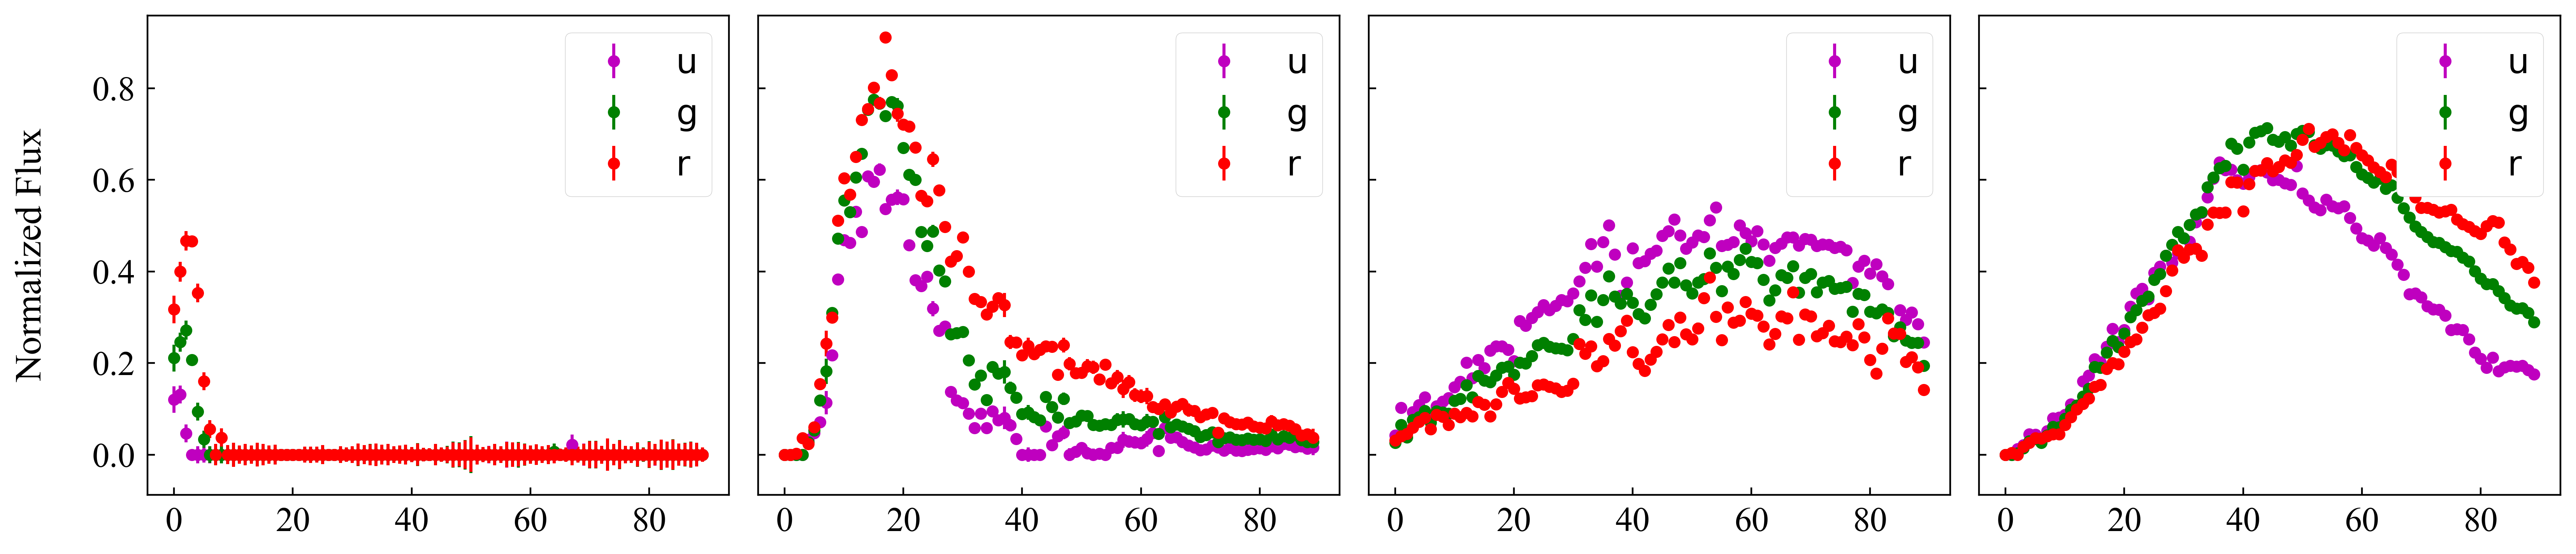

11


In [38]:
# 1. 相关模块导入
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文字体
#plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 3. 绘图
  # 3.1 共享X轴
figure,(ax1,ax2, ax3, ax4) = plt.subplots(1,4,
                                    figsize=(5*4,4),
                                    dpi=400,
                                    # 共享x轴
                                    sharey=True)

# 2. 创建制图数据
ax_list = [ax1,ax2, ax3, ax4]
for i in range(3):
    mjd = np.linspace(0,89,90)
    
    flux_1 = reconstuct[0,:,i]
    flux_err_1 = reconstuct[0,:,i+3]

        
    flux_2 = reconstuct[1,:,i]
    flux_err_2 = reconstuct[1,:,i+3]
        
    flux_3 = reconstuct[2,:,i]
    flux_err_3 = reconstuct[2,:,i+3]
        
    flux_4 = reconstuct[3,:,i]
    flux_err_4 = reconstuct[3,:,i+3]

    
    flux_list = [flux_1,flux_2, flux_3, flux_4]
    flux_err_list = [flux_err_1, flux_err_2, flux_err_3, flux_err_4]
    
    for j in range(4):
        ax_list[j].errorbar(x=mjd, y=flux_list[j], yerr=flux_err_list[j],fmt=fmt[i], capsize=2,label=bands[i])
        #ax_list[j].errorbar(x=mjd_1, y=flux_list[j], yerr=flux_err_list[j],color=color[i], marker=markers[i], capsize=2,label=label[i])

        ax_list[j].legend(fontsize="xx-large",loc="upper right",prop=font1)
        #设置坐标轴字体
        x1_label = ax_list[j].get_xticklabels() 
        [x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
        y1_label = ax_list[j].get_yticklabels() 
        [y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
        if i==0:
            ax_list[i].set_ylabel("Normalized Flux",fontsize="xx-large", labelpad=20,fontproperties="Times New Roman")

        #ax_list[j].set_ylim(-0.3,1.2)
        #ax_list[j].set_xlim(-7,85)
        
        # 2.4 坐标轴刻度字体颜色设置
        ax_list[j].tick_params(axis='y',
                     labelsize=16, # y轴字体大小设置
                     #color='r',    # y轴标签颜色设置  
                     #labelcolor='b', # y轴字体颜色设置
                     direction='in' # y轴标签方向设置
                      ) 
    
        ax_list[j].tick_params(axis='x',
                     labelsize=16, # y轴字体大小设置
                     #color='r',    # y轴标签颜色设置  
                     #labelcolor='b', # y轴字体颜色设置
                     direction='in' # y轴标签方向设置
                      )
        ax_list[j].legend(fontsize=16,
                      #bbox_to_anchor=(0,0.34,1.028, 1),
                      loc="upper right",
                      framealpha=1,
                     )

# 调整子图形之间的纵向距离
figure.subplots_adjust(wspace=0.05) 

plt.savefig("reconstruction_per_latent_2.jpg",bbox_inches='tight')

plt.show()

print(id_)